In [8]:
import pickle
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [9]:
#Resnet50 Model
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))
model.trainable = False
model = tf.keras.models.Sequential([model, GlobalMaxPool2D()])

In [12]:
#loading the pickled files
image_features = pkl.load(open('features.pkl', 'rb'))
filenames = pkl.load(open('images.pkl', 'rb'))

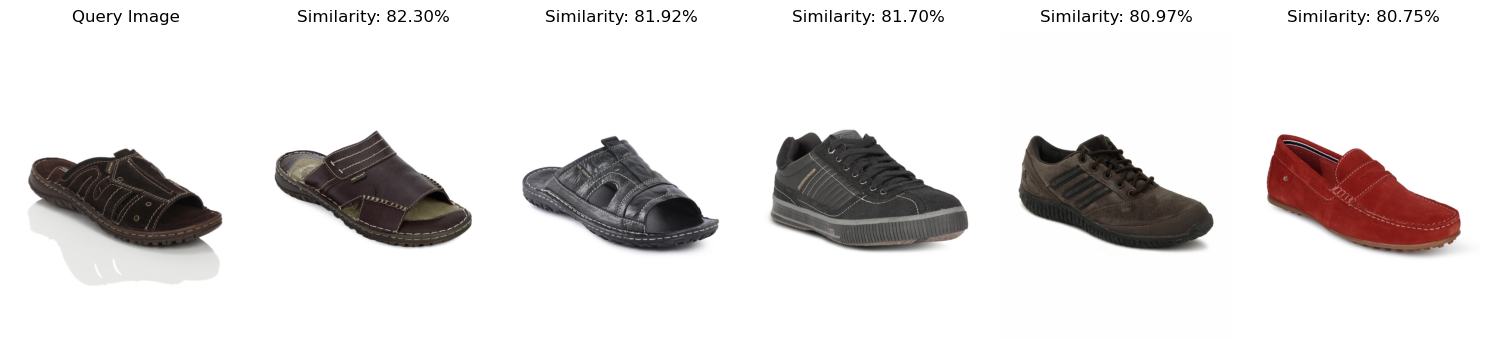

In [31]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.metrics.pairwise import cosine_similarity
import pickle as pkl

# Load image features and filenames
with open('features.pkl', 'rb') as f:
    image_features = pkl.load(f)

with open('images.pkl', 'rb') as f:
    filenames = pkl.load(f)

# Function to recommend similar images
def recommend_similar_images(query_image_index, image_features, filenames, top_n=5):
    query_features = image_features[query_image_index].reshape(1, -1)
    similarities = cosine_similarity(query_features, image_features)
    similarity_indices = similarities[0].argsort()[-top_n-1:-1][::-1]  # Exclude the query image itself
    similar_images = [(filenames[idx], similarities[0, idx]) for idx in similarity_indices]
    return similar_images

# Function to display the query image and similar images
def display_query_and_similar_images(query_image_index, image_features, filenames, top_n=5):
    # Display the query image
    query_image_path = filenames[query_image_index]
    query_image = imread(query_image_path)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(query_image)
    plt.title("Query Image")
    plt.axis('off')

    # Recommend similar images
    similar_images = recommend_similar_images(query_image_index, image_features, filenames, top_n=top_n)

    # Display similar images
    for i, (image_path, similarity_score) in enumerate(similar_images, start=2):
        similar_image = imread(image_path)
        plt.subplot(1, top_n + 1, i)
        plt.imshow(similar_image)
        plt.title(f"Similarity: {similarity_score * 100:.2f}%")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example: Display query image and similar images
query_image_index = 0  # Replace with the index of your query image
display_query_and_similar_images(query_image_index, image_features, filenames, top_n=5)
